## SVM线性划分 SVM Linear Classification

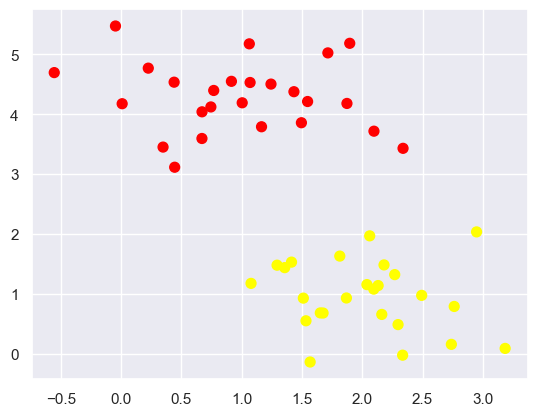

In [85]:
# data generation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

In [86]:
# Linear Kernel Function Without transformation of data
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

In [87]:
%matplotlib inline 
# 在notebook中展示图像
# Display plots inline in Jupyter Notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

# 定义绘制SVM决策边界的函数
# Define a function to plot the SVM decision boundary
def plot_svc_decision_function(model, ax=None, plot_support=True):
   
    if ax is None:
        ax = plt.gca()  # 获取当前的坐标轴
        # Get current axis if none is provided

    xlim = ax.get_xlim()  # 获取x轴的范围
    ylim = ax.get_ylim()  # 获取y轴的范围
    # Get the limits of the x and y axis

    # 在x和y轴上生成30个点的线性空间
    # Generate 30 points linearly spaced between the x and y axis limits
    x = np.linspace(xlim[0], xlim[1], 30)  
    y = np.linspace(ylim[0], ylim[1], 30)

    # 生成网格以覆盖整个坐标平面
    # Create a meshgrid to cover the entire plane
    Y, X = np.meshgrid(y, x)

    # 将网格点展平，并组合成二维坐标数组
    # Flatten the grid and combine them into a 2D array of coordinates
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    # 使用SVM模型计算每个点的决策函数值
    # Use the SVM model to compute the decision function values for each point
    P = model.decision_function(xy).reshape(X.shape)
    
    # 绘制决策边界（level=0表示决策边界，level=-1和1表示支持向量边界）
    # Plot the decision boundary (level=0 is the decision boundary, levels -1 and 1 are the support vector boundaries)
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # 如果需要，绘制支持向量
    # Optionally plot the support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, alpha=0.2)
        # 绘制支持向量的散点图，使用较大的点表示支持向量
        # Plot support vectors as scattered points

    # 恢复 x 和 y 轴的范围
    # Reset the limits of the x and y axis
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

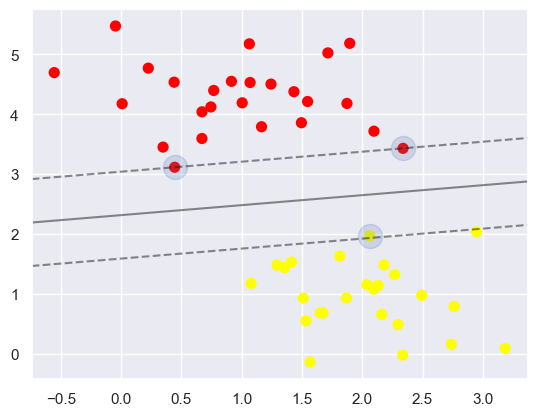

In [88]:
# 绘制数据的散点图
# Plot the scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# 调用函数绘制SVM决策边界
# Call the function to plot the SVM decision boundary
plot_svc_decision_function(model)

# 显示图形
# Display the plot
plt.show()

Random point: [2.86125592 4.51858811] -> 0
Random point: [1.34322951 4.39090157] -> 0
Random point: [0.87326855 1.22153171] -> 1
Random point: [1.19031001 0.06845539] -> 1
Random point: [-0.06010612  5.24276243] -> 0
Random point: [-0.34484183  2.96095326] -> 0
Random point: [0.11091929 4.62279901] -> 0
Random point: [2.58048021 0.11225173] -> 1
Random point: [1.33875651 4.47483773] -> 0
Random point: [1.65498134 2.99645986] -> 0
Random point: [1.11579694 0.984991  ] -> 1
Random point: [0.41809384 1.79134963] -> 1
Random point: [2.72634045 2.04822632] -> 1
Random point: [0.97234282 1.07740337] -> 1
Random point: [0.29663788 3.90929031] -> 0
Random point: [-0.54858569  4.86318711] -> 0
Random point: [0.61283126 1.92673274] -> 1
Random point: [1.01090881 2.04299676] -> 1
Random point: [1.1622792  4.27494235] -> 0
Random point: [2.0111722  4.97999362] -> 0


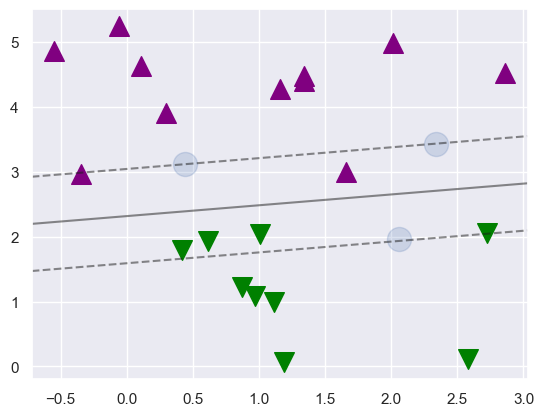

In [91]:
# check classification of random points
num_points = 20

# 随机生成一个点（在x和y定义的范围内）
# Randomly generate a point (within the x and y limits)
random_points = np.random.uniform(low=[X[:, 0].min(), X[:, 1].min()],
                                 high=[X[:, 0].max(), X[:, 1].max()],
                                  size=(num_points, 2))


# 类别预测并打印结果
# Predict the class and print the results
for i, random_point in enumerate(random_points):
    predicted_class = model.predict([random_point])

    # 打印点和预测结果
    # Print the prediction result and the randomly generated point
    random_point_class = predicted_class[0]
    print(f"Random point: {random_point} -> {random_point_class}")

    # 绘制训练数据点
    # Plot the train data point
    # plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # 原始数据散点图

    # 绘制随机生成的点
    # Plot the randomly generated point
    if random_point_class == 1:
        plt.scatter(random_point[0], random_point[1], c='green', s=200, marker='v')
    else:
        plt.scatter(random_point[0], random_point[1], c='purple', s=200, marker='^')

# 显示图像
# Show the plot
plot_svc_decision_function(model)

## SVM高斯核函数划分 SVM Gaussian Kernel Classification

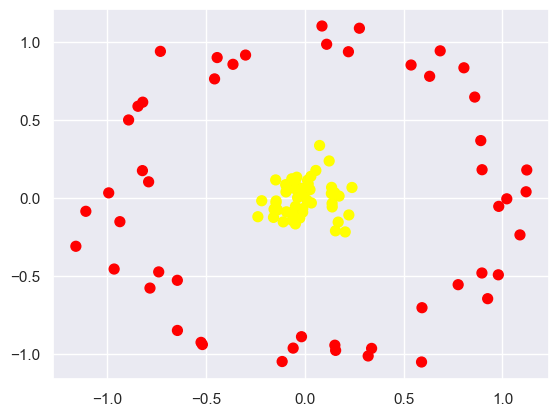

In [92]:
# data generation
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from sklearn.svm import SVC

X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

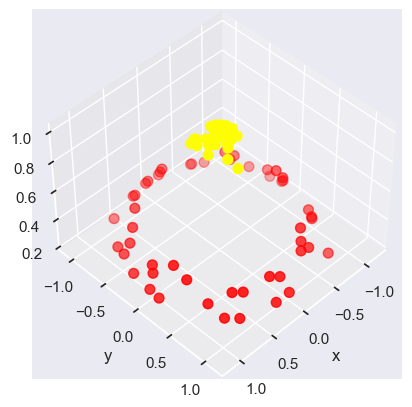

In [93]:
# new dimension
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))

# 3d visualization
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D(elev=45, azim=45, X=X, y=y)

In [94]:
# use SVM Gaussian Kernel Function（Radial Basis Function, RBF）for SVM
clf = SVC(kernel='rbf')
clf.fit(X, y)

SVC()

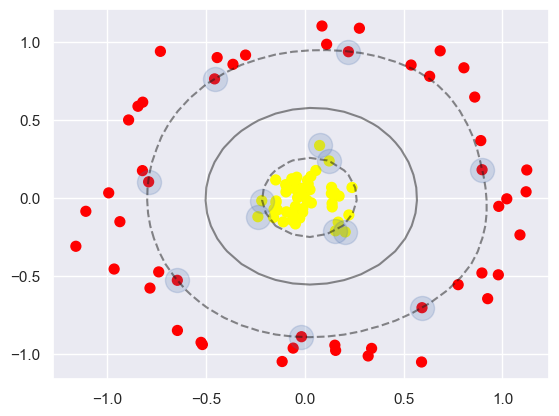

In [95]:
# check it out
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Random point: [ 0.17171932 -0.96471548] -> 0
Random point: [-1.093495    0.30656299] -> 0
Random point: [0.80817192 0.87054869] -> 0
Random point: [0.8695507  0.33852878] -> 0
Random point: [0.94626654 0.28820927] -> 0
Random point: [-1.07344978 -0.37332032] -> 0
Random point: [ 0.90309497 -0.74662879] -> 0
Random point: [-0.67733663  0.76159118] -> 0
Random point: [ 0.60269671 -0.35220688] -> 0
Random point: [ 0.87745386 -0.4357118 ] -> 0
Random point: [ 0.04735527 -0.79156141] -> 0
Random point: [-0.13891485 -0.3974487 ] -> 1
Random point: [0.6161815  0.58247582] -> 0
Random point: [ 0.5350275 -0.441104 ] -> 0
Random point: [ 1.11719197 -0.30612413] -> 0
Random point: [0.96044783 0.24412671] -> 0
Random point: [ 0.88515019 -0.45431273] -> 0
Random point: [1.12067219 0.30378075] -> 0
Random point: [-0.66701033  0.5267525 ] -> 0
Random point: [-0.85593301  0.20792539] -> 0
Random point: [ 1.12285171 -0.00655808] -> 0
Random point: [ 0.38288595 -0.04611426] -> 1
Random point: [ 0.172511

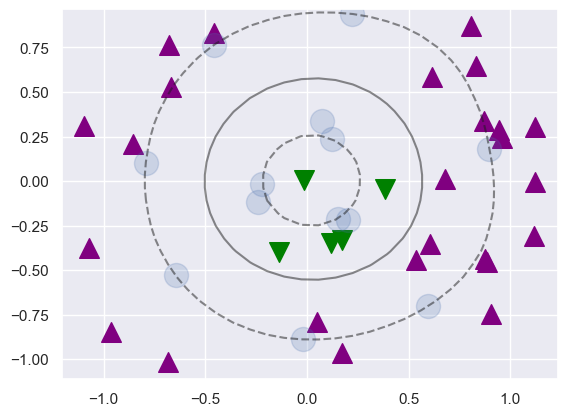

In [98]:
# check classification of random points
num_points = 30

# 随机生成一个点（在x和y定义的范围内）
# Randomly generate a point (within the x and y limits)
random_points = np.random.uniform(low=[X[:, 0].min(), X[:, 1].min()],
                                 high=[X[:, 0].max(), X[:, 1].max()],
                                  size=(num_points, 2))


# 类别预测并打印结果
# Predict the class and print the results
for i, random_point in enumerate(random_points):
    predicted_class = clf.predict([random_point])

    # 打印点和预测结果
    # Print the prediction result and the randomly generated point
    random_point_class = predicted_class[0]
    print(f"Random point: {random_point} -> {random_point_class}")

    # 绘制训练数据点
    # Plot the train data point
    # plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # 原始数据散点图

    # 绘制随机生成的点
    # Plot the randomly generated point
    if random_point_class == 1:
        plt.scatter(random_point[0], random_point[1], c='green', s=200, marker='v')
    else:
        plt.scatter(random_point[0], random_point[1], c='purple', s=200, marker='^')

# 显示图像
# Show the plot
plot_svc_decision_function(clf)